In [21]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
import umap
from sklearn.preprocessing import StandardScaler


tcps = pd.read_csv("CD86_TCPS_nuclei_M2_NT_M1NucleiObj.csv")
tcps.loc[tcps['ImageNumber'].isin([1,2,3,4,5]), 'CellType'] = 'M1_tcps'
tcps.loc[tcps['ImageNumber'].isin([6,7,8]), 'CellType'] = 'M2_tcps'
tcps.loc[tcps['ImageNumber'].isin([9,10,11]), 'CellType'] = 'NT_tcps'

smooth = pd.read_csv("CD86_smooth_nuclei_M2_NT_M1NucleiObj.csv")
smooth.loc[smooth['ImageNumber'].isin([1,2,3,4,5]), 'CellType'] = 'M1_smooth'
smooth.loc[smooth['ImageNumber'].isin([6,7,8]), 'CellType'] = 'M2_smooth'
smooth.loc[smooth['ImageNumber'].isin([9,10,11]), 'CellType'] = 'NT_smooth'

p4g4_m1 = pd.read_csv("nuclei_M1_NucleiObj.csv")
p4g4_m2_nt = pd.read_csv("nuclei_M2_NT_NucleiObj.csv")
p4g4_m1['CellType'] = 'M1_p4g4'
p4g4_m2_nt.loc[p4g4_m2_nt['ImageNumber'].isin([1,2,3]), 'CellType'] = 'M2_p4g4'
p4g4_m2_nt.loc[p4g4_m2_nt['ImageNumber'].isin([4,5,6]), 'CellType'] = 'NT_p4g4'
p4g4 = nuclei_m1.merge(p4g4_m2_nt, how='outer')

c:\_\jupyter_3\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
m1_cells = tcps[tcps['CellType'] == 'M1_tcps'].merge(smooth[smooth['CellType'] == 'M1_smooth'], how='outer')
m1_cells = m1_cells.merge(p4g4[p4g4['CellType'] == 'M1_p4g4'], how='outer')
m1_cells_data = m1_cells.drop('CellType', axis=1)

m2_cells = tcps[tcps['CellType'] == 'M2_tcps'].merge(smooth[smooth['CellType'] == 'M2_smooth'], how='outer')
m2_cells = m2_cells.merge(p4g4[p4g4['CellType'] == 'M2_p4g4'], how='outer')
m2_cells_data = m2_cells.drop('CellType', axis=1)

nt_cells = tcps[tcps['CellType'] == 'NT_tcps'].merge(smooth[smooth['CellType'] == 'NT_smooth'], how='outer')
nt_cells = nt_cells.merge(p4g4[p4g4['CellType'] == 'NT_p4g4'], how='outer')
nt_cells_data = nt_cells.drop('CellType', axis=1)

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



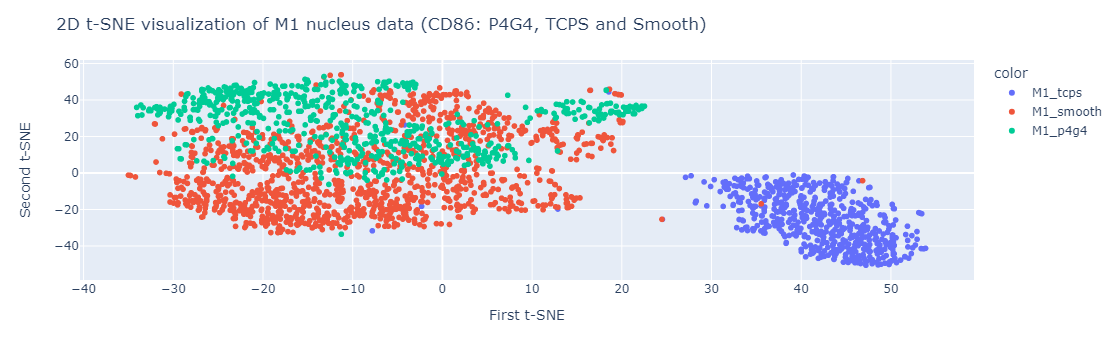

In [27]:
scaler = StandardScaler()
m1_dataset_scaled = scaler.fit_transform(m1_cells_data)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(m1_dataset_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=m1_cells.CellType)
fig.update_layout(
    title="2D t-SNE visualization of M1 nucleus data (CD86: P4G4, TCPS and Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



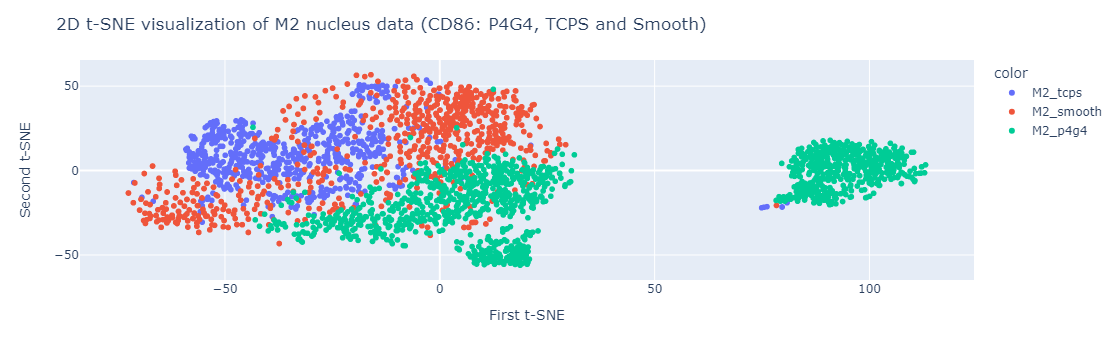

In [30]:
m2_dataset_scaled = scaler.fit_transform(m2_cells_data)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(m2_dataset_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=m2_cells.CellType)
fig.update_layout(
    title="2D t-SNE visualization of M2 nucleus data (CD86: P4G4, TCPS and Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



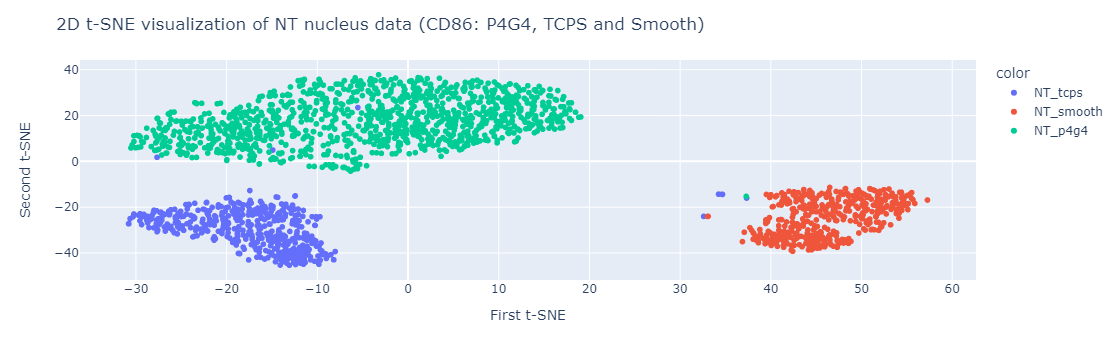

In [29]:
nt_dataset_scaled = scaler.fit_transform(nt_cells_data)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(nt_dataset_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=nt_cells.CellType)
fig.update_layout(
    title="2D t-SNE visualization of NT nucleus data (CD86: P4G4, TCPS and Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

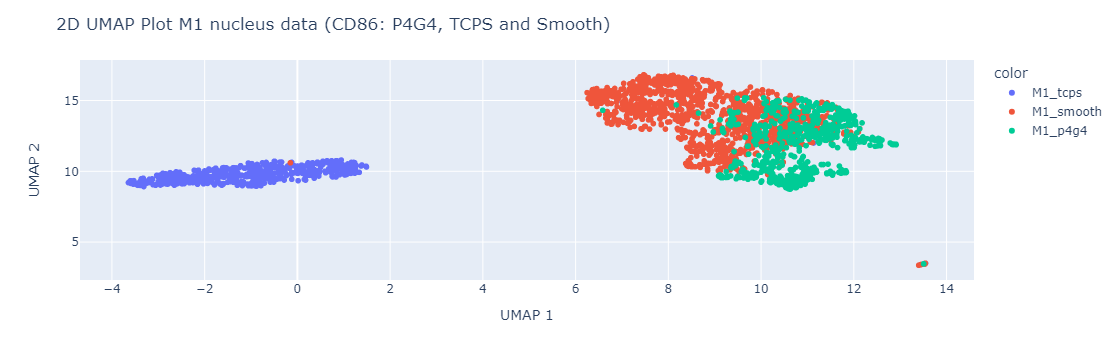

In [37]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(m1_dataset_scaled)
projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])

fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y', color=m1_cells.CellType)
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot M1 nucleus data (CD86: P4G4, TCPS and Smooth)')

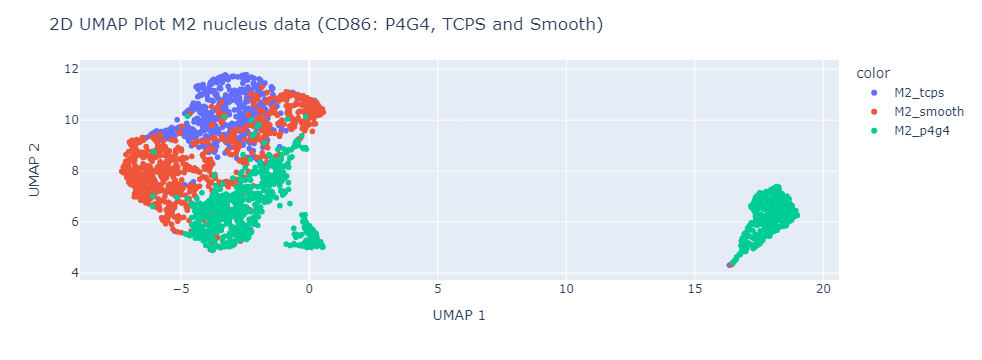

In [38]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(m2_dataset_scaled)
projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])

fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y', color=m2_cells.CellType)
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot M2 nucleus data (CD86: P4G4, TCPS and Smooth)')

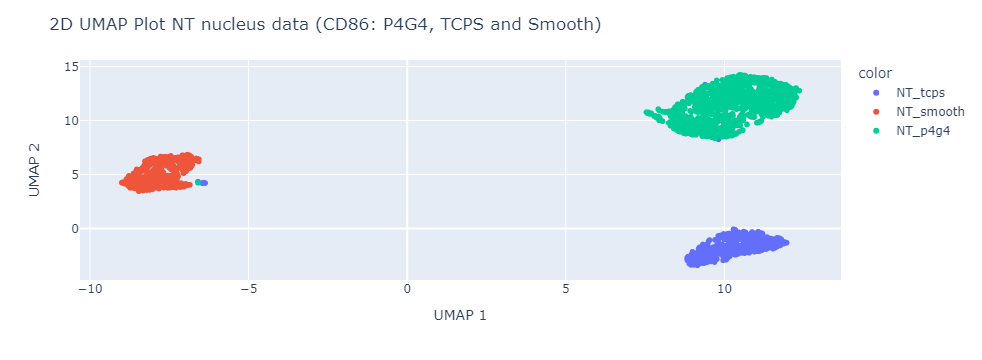

In [39]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(nt_dataset_scaled)
projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])

fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y', color=nt_cells.CellType)
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot NT nucleus data (CD86: P4G4, TCPS and Smooth)')

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



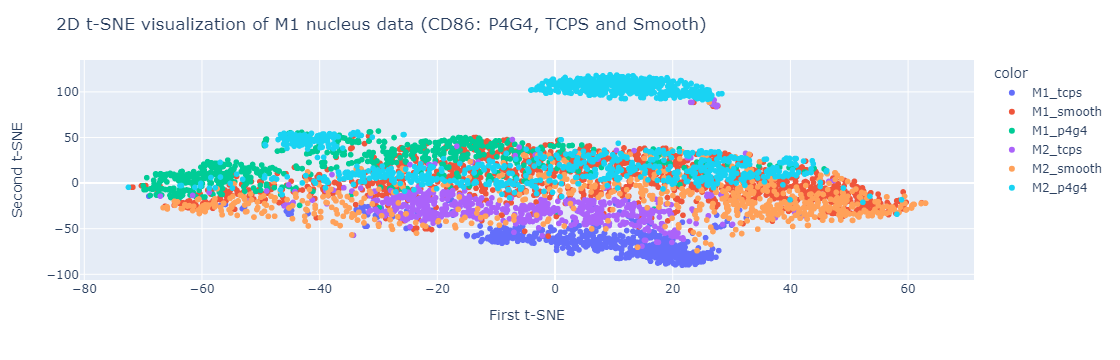

In [41]:
m1_m2_cells = m1_cells.merge(m2_cells, how='outer')
m1_m2_cells_data = m1_m2_cells.drop('CellType', axis=1)

m1_m2_dataset_scaled = scaler.fit_transform(m1_m2_cells_data)
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(m1_m2_dataset_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=m1_m2_cells.CellType)
fig.update_layout(
    title="2D t-SNE visualization of M1 nucleus data (CD86: P4G4, TCPS and Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()